In [13]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
with zipfile.ZipFile('misinfo_processed.zip', 'r') as zipf:
    with zipf.open('misinfo_processed.csv') as f:
        df = pd.read_csv(f)

df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


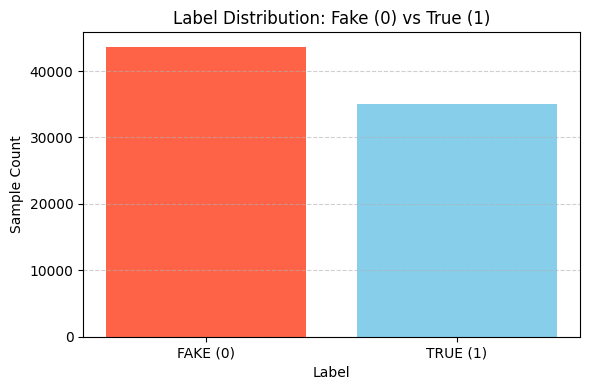

In [15]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(['FAKE (0)', 'TRUE (1)'], label_counts.values, color=['tomato', 'skyblue'])
plt.title('Label Distribution: Fake (0) vs True (1)')
plt.xlabel('Label')
plt.ylabel('Sample Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Nhận xét**:

Tập dữ liệu có 2 nhãn rõ ràng:

- **FAKE (label = 0)**: khoảng 43,000 mẫu

- **TRUE (label = 1)**: khoảng 35,000 mẫu

Mặc dù số lượng hơi lệch, nhưng không quá mất cân bằng — phù hợp cho bài toán phân loại nhị phân.

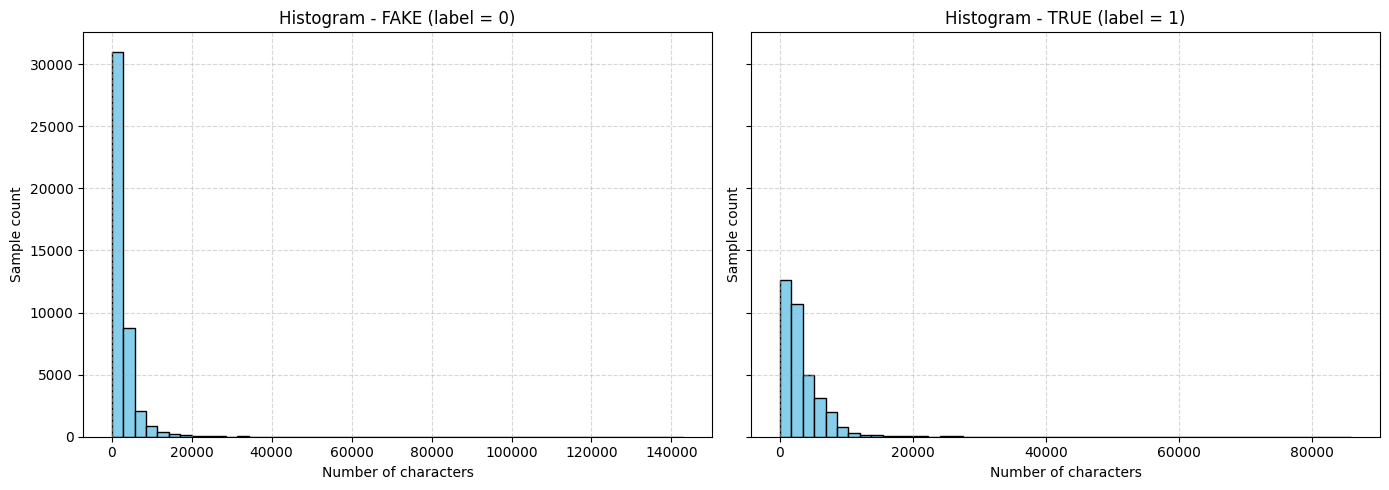

In [16]:
df['text_length'] = df['text'].astype(str).str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

labels = {0: "FAKE (label = 0)", 1: "TRUE (label = 1)"}

for i, label in enumerate([0, 1]):
    subset = df[df['label'] == label]
    axes[i].hist(subset['text_length'], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram - {labels[label]}')
    axes[i].set_xlabel('Number of characters')
    axes[i].set_ylabel('Sample count')
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### **Nhận xét**:

- Cả hai nhãn đều có phân phối lệch phải (right-skewed) — đa số bài viết ngắn, chỉ một số rất dài.

- **FAKE (label = 0)**:
    - Có nhiều văn bản cực ngắn, nhiều nhất tập trung ở < 500 ký tự.
    - Xuất hiện một số outlier có độ dài rất lớn (lên tới hơn 140,000 ký tự).
- **TRUE (label = 1)**:
    - Cũng có văn bản ngắn, nhưng đỉnh phân phối nằm cao hơn FAKE.
    - Không có văn bản dài quá mức như FAKE.

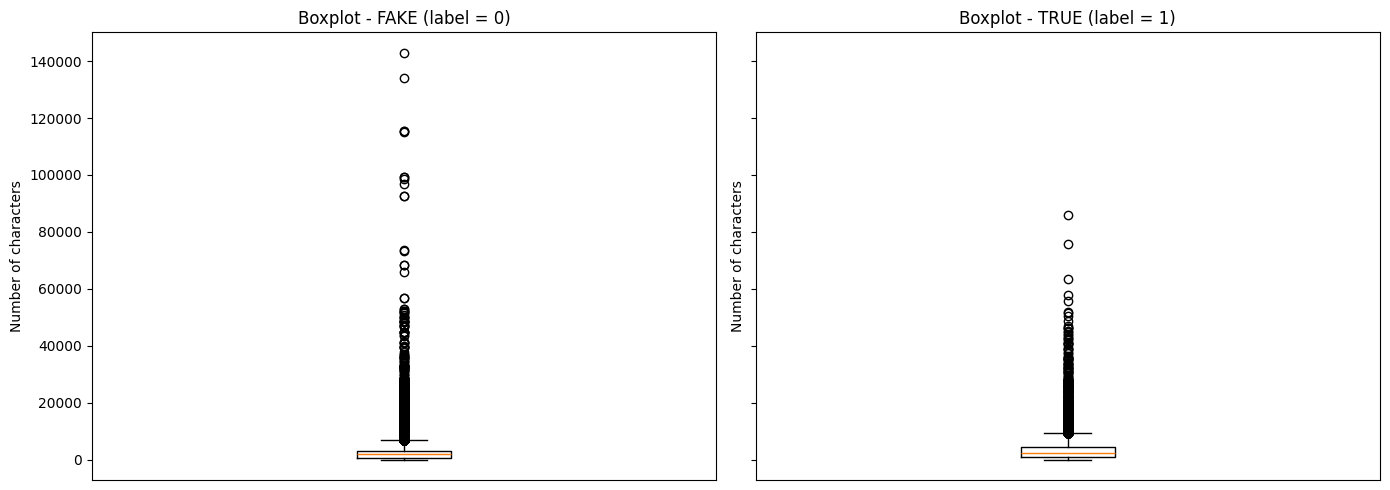

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for i, label in enumerate([0, 1]):
    subset = df[df['label'] == label]
    axes[i].boxplot(subset['text_length'], vert=True)
    axes[i].set_title(f'Boxplot - {labels[label]}')
    axes[i].set_ylabel('Number of characters')
    axes[i].set_xticks([])

plt.tight_layout()
plt.show()


### **Nhận xét**:

- Cả hai nhãn có nhiều outlier (biểu diễn bằng các chấm rời).

- **FAKE**:
    - Median thấp hơn TRUE $\rightarrow$ văn bản FAKE thường ngắn hơn.
    - Có nhiều giá trị dị thường cực lớn.

- **TRUE**:
    - Ít outlier hơn.
    - Độ phân tán thấp hơn FAKE $\rightarrow$ văn bản TRUE có tính nhất quán cao hơn về độ dài.